# Lab 4. Probabilistic Inference
# Task 4.2 Diabetes Diagnosis Using Naïve Bayes 
## Problem Descriptions
create a model to predict progression of diabities by using medical history of patients. Use the sample diabities data from sklearn lib.
## Implementation and Results

Below diagram represent the solution approach.
<img src = 'https://drive.google.com/uc?id=1LKjojxzcDwxBVCve0pk0W8y0nBQMAQ1O'/>

In [1]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

# import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import patches
import math
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [3]:
diabetes = datasets.load_diabetes()
#X = diabetes.data[:,[2,3,9]]
X = diabetes.data
Y = [math.floor(x/150) for x in diabetes.target]

#loading data as dataframe
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], Y],
                     columns= diabetes['feature_names'] + ['target'])

diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
diabetes_df.head(15)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,0.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,0.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,0.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,0.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,2.0


## correlation
* no feature have have more than 80% correlation, so we can use all features in our model.

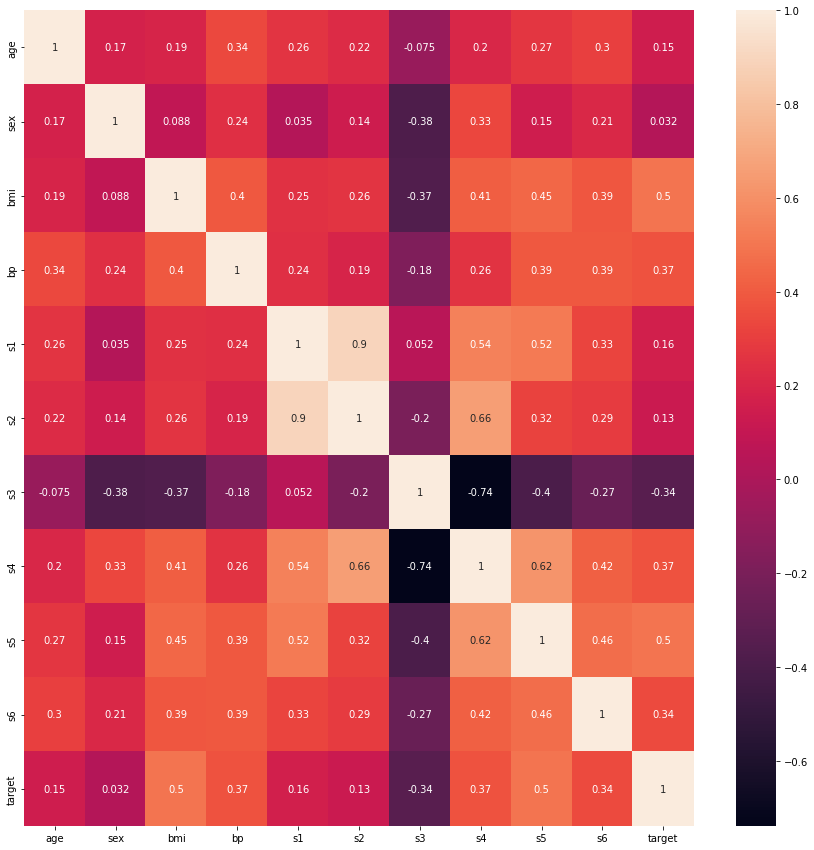

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
plot =  sns.heatmap(diabetes_df.corr(),annot=True)


In [6]:
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)


Accuracy: 0.6756756756756757
Confusion Matrix:
 [[45 21  0]
 [12 30  0]
 [ 0  3  0]]
Prior:
 [0.51963746 0.44712991 0.03323263]
Mean:
 [[-0.01056209 -0.00307692 -0.02354494 -0.01616603 -0.01222459 -0.01046437
   0.01473478 -0.01842542 -0.02389469 -0.01632161]
 [ 0.00717479  0.00237518  0.02070294  0.02028274  0.00995929  0.00783937
  -0.01655972  0.01706756  0.02514091  0.01521086]
 [-0.00122155  0.00735205  0.07502188  0.01342167  0.01169022  0.01038649
  -0.03838043  0.04974024  0.04325178  0.05540558]]
Variance:
 [[0.0024073  0.0022344  0.00137799 0.00162012 0.00197431 0.0020987
  0.00244236 0.00160666 0.00162403 0.00170567]
 [0.00226166 0.00227114 0.00217699 0.00214936 0.00242953 0.00237551
  0.00124266 0.00214445 0.00183433 0.00236458]
 [0.00253787 0.00225279 0.0018993  0.00246413 0.001651   0.0013478
  0.00149659 0.0030745  0.00128012 0.002172  ]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

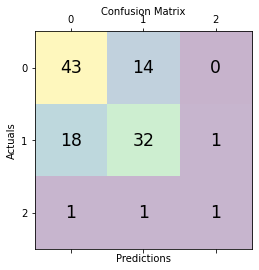

In [ ]:
conf_matrix = cm
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Discussions

most vital information about a model is it's accuracy.

        accuracy is 67%

* accuracy gives us idea of how the model will behave in real world.
* we have created here a classification model using GaussianNB().
* internally it uses Bayes conditional probality theorum.




